## Homework 2, Part 1 : Linear Regression with Regularization

In [150]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.neighbors import KernelDensity
from scipy import stats as st
from sklearn.datasets import make_blobs

In [151]:
class LR:
  def __init__(self, lr=0.0025, epochs=50, split=0.1):
    self.lr = lr
    self.epochs = epochs
    self.w = None
    self.b = None
    self.cross_ent = np.zeros(epochs)
    self.split = split

  def score(self,X):
    return 1.0/(1 + np.exp(-(np.dot(self.w, X) + self.b)))

  def crossent(self, X, y):
    ce = np.log(self.score(X[y==1])).sum() + np.log(1.0 - self.score(X[y==0])).sum()
    return -ce

  def fit(self, X, y):
    i = np.random.permutation(len(y))
    X, y = X[i], y[i]
    self.w, self.b = np.zeros(X.shape[1]),0
    M = np.floor((1-self.split)*len(y)).astype(int)
    Xtr, ytr, Xva, yva = X[:M],y[:M], X[M:], y[M:]
    print(ytr)
    for t in range(self.epochs):
      for i in np.random.permutation(len(ytr)):
        self.w += self.lr*(ytr[i] - self.score(Xtr[i]))*Xtr[i]
        self.b += self.lr*(ytr[i]- self.score(Xtr[i]))
      self.cross_ent[t] = self.crossent(Xva, yva)

  def predict(self, X):
    return 1.0*(self.score(X[i])>=0.5)

  def predict_proba(self, X):
    return self.score(X[i])

  def predict_log_proba(self, X):
    return np.log(self.predict_proba(X))

##Homework 2, Part 2 : Density Estimation

In [152]:
def gen_cb(N, a, alpha):
  """
  N: number of points on the checkerboard
  a: width of the checker board (0<a<1)
  alpha: rotation of the checkerboard in radians
  """
  d = np.random.rand(N, 2).T
  d_transformed = np.array([d[0]*np.cos(alpha)-d[1]*np.sin(alpha),
  d[0]*np.sin(alpha)+d[1]*np.cos(alpha)]).T
  s = np.ceil(d_transformed[:,0]/a)+np.floor(d_transformed[:,1]/a)
  lab = 2 - (s%2)
  data = d.T
  return data, lab

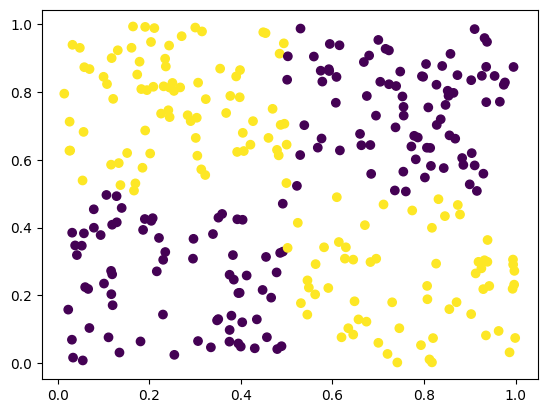

In [153]:
datam, lab = gen_cb(300, 0.5, 0)
plt.scatter(datam[:, 0], datam[:, 1], c=lab)

In [154]:
#these code snippets prepare data for class based density estimation
number_of_1 = sum(lab==1.0)
number_of_2 = sum(lab==2.0)
lab1_class = list()
lab2_class = list()
for i in range(datam.shape[0]):
  if lab[i]==1.0:
    lab1_class.append(datam[i, :])
  else:
    lab2_class.append(datam[i, :])

lab1_class = np.array(lab1_class)
lab2_class = np.array(lab2_class)

In [155]:
def estimate_densities(data, nbins):
  """
  This function use kernel density estimation as a density estimate technique, and
  draw pcolormesh
  it takes class data and pseudo color plot bin number as input and returns kernel
  that will be used for density estimator
  """
  x = data[:-1, 0]
  y = data[:-1, 1]
  kernel = st.gaussian_kde(data.T)

  xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
  zi = kernel(np.vstack([xi.flatten(), yi.flatten()]))
  plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap='RdBu')
  plt.show()
  return kernel

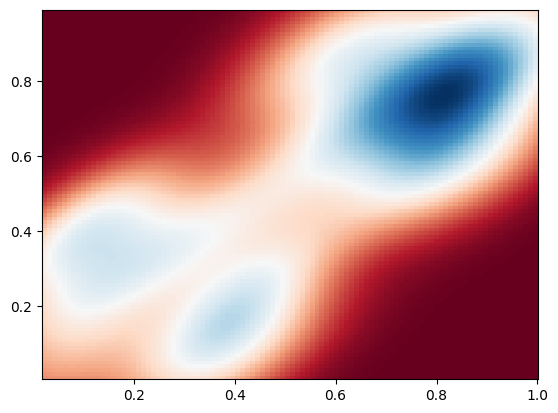

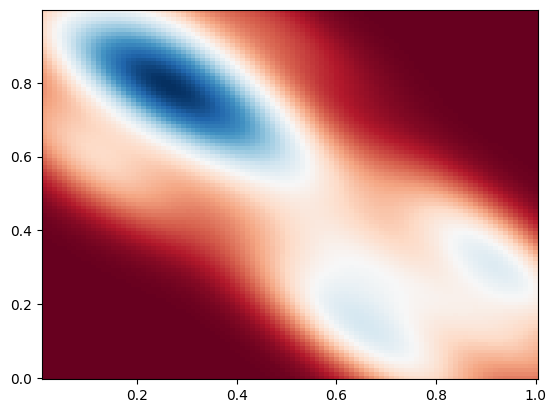

[0.67503137 0.7879274 ] will be in class 1
[0.49490521 0.70606788] will be in class 2


In [156]:
kernel1 = estimate_densities(lab1_class, 100)
kernel2 = estimate_densities(lab2_class, 100)

# Maximum likelihood estimators for classes
p_y_1 = number_of_1 / number_of_1+number_of_2
p_y_2 = number_of_2 / number_of_1+number_of_2

def classify(test_point, kernel1, kernel2, p_y_1, p_y_2):
  """
  This function classify any test point by taking test_point, class kernels
  and class likelihood estimator as input.
  """
  density1 = kernel1.evaluate(test_point)
  density2 = kernel2.evaluate(test_point)
  class_1 = (density1 * p_y_1) / ((density1 * p_y_1) + (density2 * p_y_2))
  class_2 = (density2 * p_y_2) / ((density1 * p_y_1) + (density2 * p_y_2))
  if class_1 > class_2:
    print(f'{test_point} will be in class 1')
  else:
    print(f'{test_point} will be in class 2')

classify(lab1_class[-1], kernel1, kernel2, p_y_1, p_y_2)
classify(lab2_class[-1], kernel1, kernel2, p_y_1, p_y_2)